In [2]:
## Here we import the all the modules
import numpy as np
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
##Load the cancer datasets
cancer = datasets.load_breast_cancer()
from sklearn import preprocessing

In [4]:
x = cancer.data
y = cancer.target
df = pd.DataFrame(x)
df['temp'] = 1
x = df.values
x

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 4.601e-01, 1.189e-01,
        1.000e+00],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 2.750e-01, 8.902e-02,
        1.000e+00],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 3.613e-01, 8.758e-02,
        1.000e+00],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 2.218e-01, 7.820e-02,
        1.000e+00],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 4.087e-01, 1.240e-01,
        1.000e+00],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 2.871e-01, 7.039e-02,
        1.000e+00]])

In [6]:

def sigmoid(x,m):
    ## sigmoid function definition it takes the x and m and return the sigmoid function
    z = x@m
    ex = 1 +  np.exp(-z)
    h = 1/ex
    return h
def predict(m,x):
    ## it prediction the value by x and final m
    ## after getting this we compare this value with 0.5
    return x@m
def score(y, y_pred):
    ## it's giving the score by using the formula 1 - u/v
    score = 1 - ((y - y_pred)**2).sum()/((y - y.mean())**2).sum()
    return score

In [7]:
def cost(x,y,m):
    ## this function return the cost by using the formula
    l = x.shape[0]
    h = sigmoid(x,m)
    ## Here we add the value of 0.00001 so that when the value of approx equal to 0 or 1 then our log function
    ## is also defined in that case
    ct = (-1/l)*(( (y*np.log(h + 0.00001)) + (1 - y)*(np.log(1 - h + 0.00001)) ).sum())
    return ct

In [8]:
def stepgradient(x,y,alpha,m):
    l = x.shape[0]
    k = np.transpose(x)
    ## calculation of step gradient which has same formula as linear regression
    m_temp =(1/l)*(k)@((sigmoid(x,m) - y))
    m = m - alpha*(m_temp)
    return m

In [27]:
def gd(x,y):
    num_iterators = 1000
    ## store the value of cost with iteration so that by using graph we can analyse them
    J_cost = []
    iters = []
    alpha = 2
    n = x.shape[1]
    m = np.zeros((n,1))
    for i in range(num_iterators):
        m = stepgradient(x,y,alpha,m)
        ct = (cost(x,y,m))
        J_cost.append(ct)
        iters.append(i)
    plt.plot(iters,J_cost)
    plt.ylabel("cost")
    plt.xlabel("iteration")
    plt.show()
    return m

In [28]:
def run():
    cancer = datasets.load_breast_cancer() 
    x = cancer.data
    y = cancer.target
    scaler = preprocessing.StandardScaler()
    scaler.fit(x)
    ## it's important that we transform our x without using the 1 value because if we
    ## do transform after adding 1 then the value of 1 become 0
    x = scaler.transform(x)
    df = pd.DataFrame(x)
    df.columns = cancer.feature_names
    df['temp'] = 1
    x = df.values
    
    l = x.shape[0]
    y = y.reshape((l,1))
    m = gd(x,y)
    y_pred = predict(m,x)
    s = y_pred.shape[0]
    ## here we 
    for i in range(s):
        if y_pred[i] <= 0.5:
            y_pred[i] = 0
        else:
            y_pred[i] = 1
    print("score: ",score(y,y_pred))
    print("Accuracy: ",(np.mean(y_pred == y))*100)

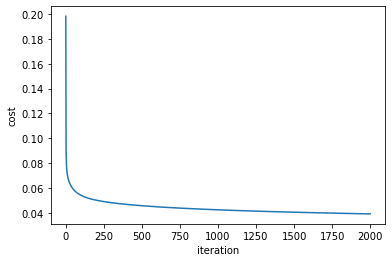

score:  0.939855187357962
Accuracy:  98.59402460456941


In [29]:
run()